In [1]:
# !pip install igraph # for directed graph
# import igraph as ig

In [2]:
# !pip install networkx
import networkx as nx

In [3]:
import numpy as np
import sys
sys.path.append('..')
import umbrella_mesh
import linkage_vis
import load_jsondata
from configuration import parse_input

In [4]:
from figure_2D import plot_undeployed_2D
from tools import get_center_position
import deploy_path as dp

In [5]:
def print_bumps_depressions(graph, bumps, depressions):
    print('\n--> bumps:')
    print(*[(b, graph.nodes[b]['height']) for b in bumps], sep='\n')
    print('\n--> depression:')
    print(*[(d, graph.nodes[d]['height']) for d in depressions], sep='\n')

### **Mesh Path**

In [6]:
from mesh_paths import  saddle_path,  igloo_coars_path, \
                        squid_path,   igloo_path,       \
                        peanut_path,  lilium_path,      \
                        hive_path,    trililium_path

In [7]:
mesh_path = squid_path

---

In [8]:
io, input_data, target_mesh, curr_um, plate_thickness_scaled, target_height_multiplier = parse_input(mesh_path, handleBoundary = False, isHex = False, use_target_surface = False)

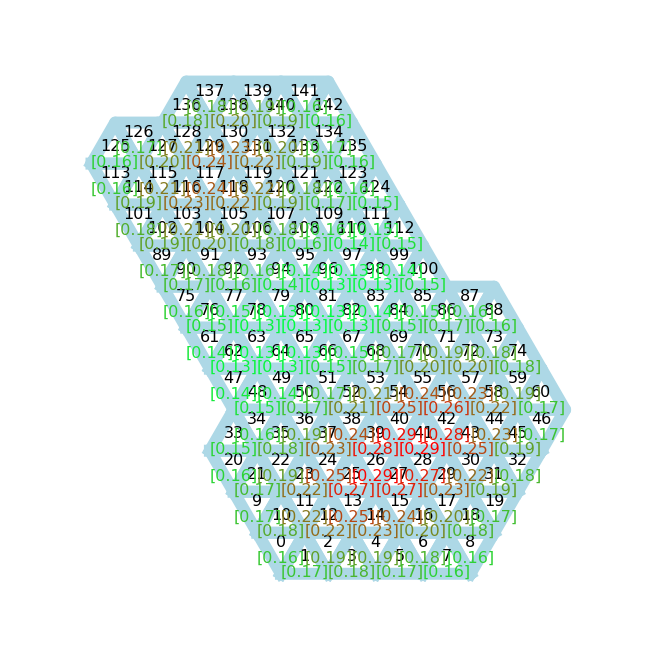

In [9]:
plot_undeployed_2D(input_data,
                   curr_um,
                   show_height=True,
                   show_plot=True)

In [10]:
connectivity = np.array(input_data['umbrella_connectivity'])
pos = get_center_position(curr_um)[:,:2]

In [11]:
graph = dp.create_graph(connectivity, curr_um)

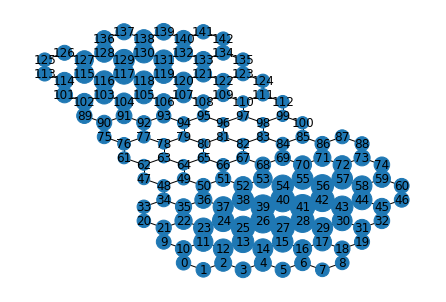

In [12]:
dp.draw_height(graph, pos, with_labels=True)

In [25]:
drop_extrems_at_boundary = True # default True
drop_boudary             = False  # default False
surroundings             = False  # default False -> extrem not compare to direct neighbors, but rather compared to its surroundings
bumps, depressions = dp.find_extrems(graph, surroundings=surroundings, drop_extrems_at_boundary=drop_extrems_at_boundary, drop_boudary=drop_boudary)

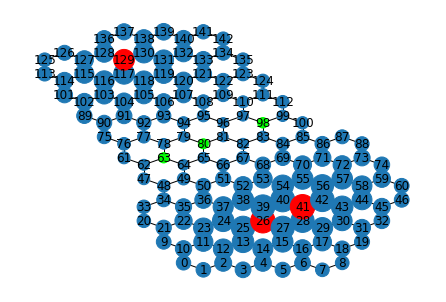


--> bumps:
(26, 0.2910722018484907)
(41, 0.29371571858847956)
(129, 0.23724376135437994)

--> depression:
(63, 0.1293838457028468)
(80, 0.12748595412189972)
(98, 0.13090008094655228)


In [26]:
# draw extrem points (bumps are red and depression are green)
dp.draw_height_extrems(graph, pos, bumps, depressions, with_labels=True)
print_bumps_depressions(graph, bumps, depressions)

In [27]:
paths = dp.shortes_paths(graph, bumps, depressions); paths

[[26, 39, 38, 52, 51, 66, 65, 80],
 [41, 40, 39, 38, 52, 51, 66, 65, 80],
 [129, 117, 118, 105, 106, 93, 94, 79, 80]]

In [28]:
# raise NotImplementedError('stop `run all` here to select some depressions in next cell')

In [29]:
kept_depressions = depressions

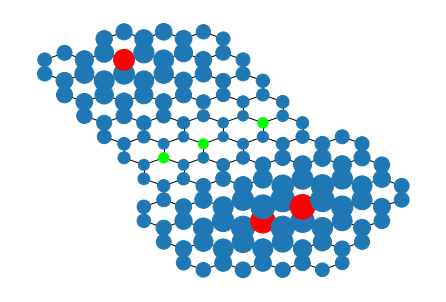

In [30]:
dp.draw_height_extrems(graph, pos, bumps, kept_depressions) # bumps:red | depression:green

In [33]:
paths = dp.shortes_paths(graph, bumps, kept_depressions, force_smalest_dep=True); paths

[[26, 39, 38, 52, 51, 66, 65, 80],
 [41, 40, 39, 38, 52, 51, 66, 65, 80],
 [129, 117, 118, 105, 106, 93, 94, 79, 80]]

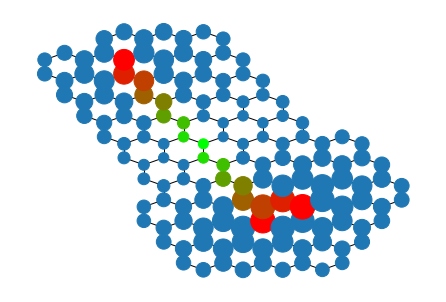

In [34]:
dp.draw_height_path(graph, pos, paths)

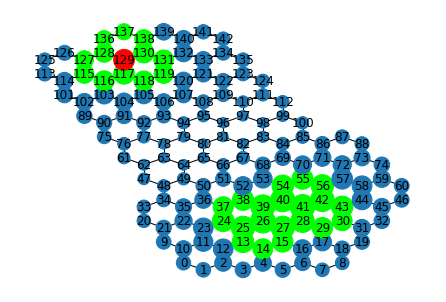

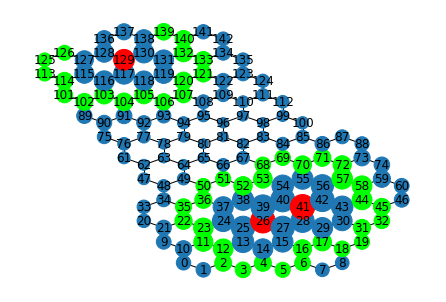

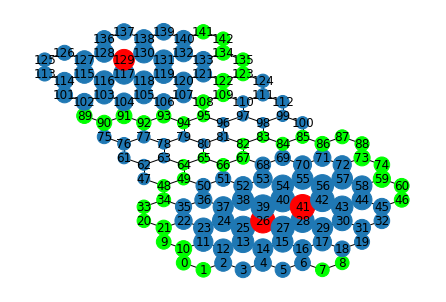

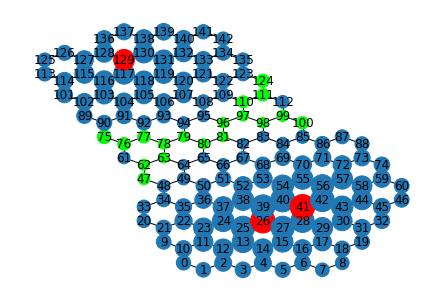

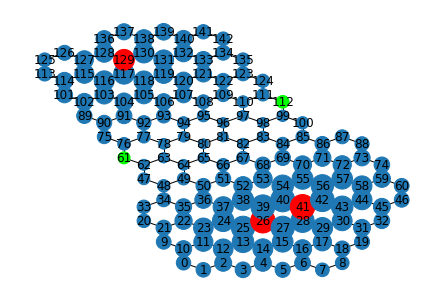

In [35]:
dp.surround_bumps(graph, bumps, level=10, verbose=True, pos=pos);

In [22]:
def link_bumps(graph, bumps):
    if len(bumps)<2 : return []
    
    paths = {}
    for i,b_source in enumerate(bumps):
        paths[b] = []
        for b_target in bumps[i+1:]:
            paths[b].append(nx.shortest_path(graph,source=b_source,target=b_target, weight='weight'))
    